In [1]:
import numpy as np, scipy.stats as st
import statsmodels.stats.api as sms
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [ ]:
# Загрузим данные, проверим число наблюдений и столбцов, наличие пропусков.
# Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведём переменные к нужным типам.

In [2]:
df=pd.read_csv('C:/Users/mgika/Documents/KK_Data_analyst/statistics/london.csv')
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
df.shape

(17414, 10)

In [5]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [6]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')
df = df.set_index('timestamp')

<AxesSubplot:xlabel='timestamp'>

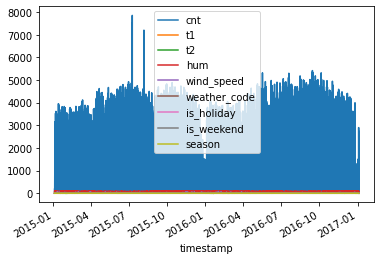

In [8]:
# попробуем посмотреть на число поездок по датам и времени. Постройте график, где:
# по оси x – дата (timestamp)
# по оси y – число поездок (cnt)


df.plot()

In [ ]:
# Очень сложно что-то понять из такого графика,
# нужно преобразовать данные, чтобы увидеть тренды

<AxesSubplot:xlabel='timestamp'>

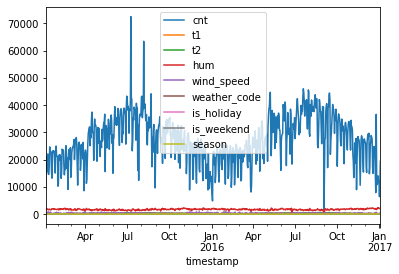

In [7]:
# Агрегируем число поездок по дням и визуализируем результат.


df.resample(rule = 'D').sum().plot()

In [ ]:
# Итак, мы обнаружили на графике некоторые скачки. Давайте проверим, что же могло произойти в тот день.
# Для этого разделим дальнейшие действия на несколько этапов:

In [9]:
# сначала посчитаем скользящее среднее с окном 3, чтобы сгладить ряд

df_resample = df.resample(rule = 'D').sum()
df_resample['roll_mean'] = df_resample.cnt.rolling(3).mean()

In [11]:
# далее – разницу между наблюдаемыми и сглаженными значениями и стандартное отклонение

df_resample['mean_diff'] = df_resample.cnt - df_resample.roll_mean
np.std(df_resample.mean_diff)

4558.58664111794

In [12]:
# определим верхние и нижние границы 99% доверительного интервала 

df_resample['upper_bound'] = df_resample.roll_mean + 2.576 * np.std(df_resample.mean_diff) # 2.576 is the Z-score for 99% CI
df_resample['lower_bound'] = df_resample.roll_mean - 2.576 * np.std(df_resample.mean_diff)

In [14]:
# изучим аномально высокие значения
# выведем наблюдения, для которых наблюдаемые значения
# оказались больше верхней границы 99% доверительного интервала.

df_resample.query('cnt > upper_bound').sort_values('cnt')

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,roll_mean,mean_diff,upper_bound,lower_bound
timestamp,,,,,,,,,,,,,
2016-09-04,27512,452.5,452.5,1676.5,561.5,71.0,0.0,24.0,48.0,14259.000000,13253.000000,26001.919188,2516.080812
2016-12-25,36653,300.0,300.0,1906.0,664.0,87.0,0.0,24.0,72.0,19650.666667,17002.333333,31393.585854,7907.747479
2015-08-06,63468,466.5,466.5,1625.0,357.5,50.0,0.0,0.0,24.0,46627.333333,16840.666667,58370.252521,34884.414146
2015-07-09,72504,427.0,421.0,1175.5,311.5,28.0,0.0,0.0,24.0,50705.000000,21799.000000,62447.919188,38962.080812


In [ ]:
# Вероятная причина - забастовки в метро в этот день

In [13]:
# изучим аномально низкие значения
# выведем наблюдения, для которых наблюдаемые значения
# оказались меньше нижней границы 99% доверительного интервала.

df_resample.query('cnt < lower_bound').sort_values('cnt')

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,roll_mean,mean_diff,upper_bound,lower_bound
timestamp,,,,,,,,,,,,,
2016-09-02,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26086.333333,-26086.333333,37829.252521,14343.414146
2015-11-14,8898,270.0,235.0,1951.0,560.0,105.0,0.0,24.0,48.0,21037.333333,-12139.333333,32780.252521,9294.414146
2016-11-12,8990,214.0,180.0,1976.0,247.5,108.0,0.0,23.0,46.0,20878.000000,-11888.000000,32620.919188,9135.080812
2015-05-14,15609,237.5,189.5,2039.0,513.0,118.0,0.0,0.0,0.0,28709.333333,-13100.333333,40452.252521,16966.414146
2015-07-24,16034,380.5,380.5,1810.0,275.0,108.0,0.0,0.0,24.0,31013.666667,-14979.666667,42756.585854,19270.747479
2016-09-10,17080,460.0,460.0,1932.0,392.0,89.0,0.0,24.0,48.0,31262.000000,-14182.000000,43004.919188,19519.080812
2015-08-24,17400,380.0,380.0,2099.0,321.0,126.0,0.0,0.0,24.0,29529.333333,-12129.333333,41272.252521,17786.414146
2016-09-16,21967,416.0,416.0,1900.5,416.0,115.0,0.0,0.0,48.0,36193.333333,-14226.333333,47936.252521,24450.414146
2015-07-12,23240,444.5,444.5,1811.5,520.5,80.0,0.0,24.0,24.0,36036.666667,-12796.666667,47779.585854,24293.747479


In [ ]:
# Вероятная причина - ошибка при сборе данных